# Zoo Animal KNN and Decision Tree
### Submitted by Valentinus Mitchell Rahina Surya

## Attribute Information

Features consist of:
- animal name
- hair
- feathers
- eggs
- milk
- airborne
- aquatic
- predator
- toothed
- backbone
- breathes
- venomous
- fins
- legs
- tail
- domestic
- catsize
- type

Implement a KNN model to classify the animals into type

## Loading Essential Libraries

In [39]:
import pandas as pd # data processing, CSV file
import numpy as np # linear algebra
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
# Importing ML Libraries
from sklearn.neighbors import KNeighborsClassifier # Import KNN 
from sklearn.model_selection import train_test_split, cross_val_score # Import train_test_split function
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings # import warnings library
warnings.filterwarnings('ignore') # if there is a warning after some codes, this will avoid me to see them.

In [40]:
# Import dataset
animal = pd.read_csv('Zoo.csv')
animal.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [41]:
#first column is useless and can be dropped
animal.drop('animal name', inplace=True, axis=1)

In [115]:
animal.head()
# From the below, the value which I gonna predict here is type 

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [44]:
# The given dataset has 42 duplicate values.
# Ignore duplicate because we eliminated the name feature
animal.duplicated().sum()

42

In [45]:
animal.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [47]:
#This dataset contains 101 rows and 17 columns
animal.shape

(101, 17)

In [49]:
#The values are all interger base on the system x64 and from this we can make sure there are no missing values
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [51]:
#This gives the basic details about the dataset of the colomn.
animal.describe(include='all')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [53]:
animal['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

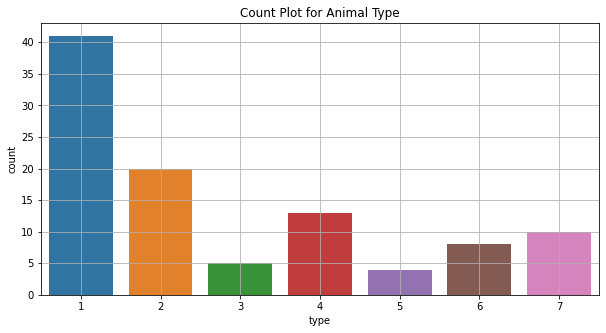

In [55]:
#count plot for type
plt.figure(figsize=(10,5))
sns.countplot(animal['type'])
plt.title('Count Plot for Animal Type')
plt.grid(True)
plt.show()

In [56]:
animal['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [60]:
x = animal.drop('type', axis=1)
y = animal[['type']]

In [61]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [62]:
y.head()

,type
0,1
1,1
2,4
3,1
4,1


In [64]:
#scaling of data is not needed here
#test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=15)
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
#for train data
y_train_pred = knn_model.predict(X_train)

In [66]:
accuracy_score(y_train, y_train_pred)

1.0

In [67]:
confusion_matrix(y_train, y_train_pred)

array([[37,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  8]], dtype=int64)

In [68]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [69]:
#for test data
y_test_pred = knn_model.predict(X_test)

In [70]:
accuracy_score(y_test, y_test_pred)

0.9523809523809523

In [71]:
confusion_matrix(y_test, y_test_pred)

array([[4, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [72]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         5
           5       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.83      0.75      0.78        21
weighted avg       1.00      0.95      0.97        21



In [73]:
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())

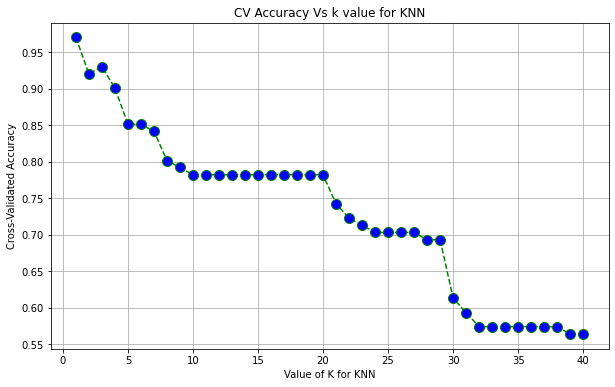

In [74]:
# ploting accuracy score against K values
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores,color='green',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.grid(True)
plt.title('CV Accuracy Vs k value for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Decision Tree 

In [75]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [76]:
#The given dataset has 41 duplicate values.
animal[animal.duplicated()]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
20,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
31,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [79]:
# These two data are same
animal.iloc[93:95]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
93,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1


In [80]:
animal.drop_duplicates(inplace=True)

In [81]:
# Duplicated data deleted
# Now the duplicate values are 0
animal.duplicated().sum()

0

In [82]:
animal.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [83]:
animal.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

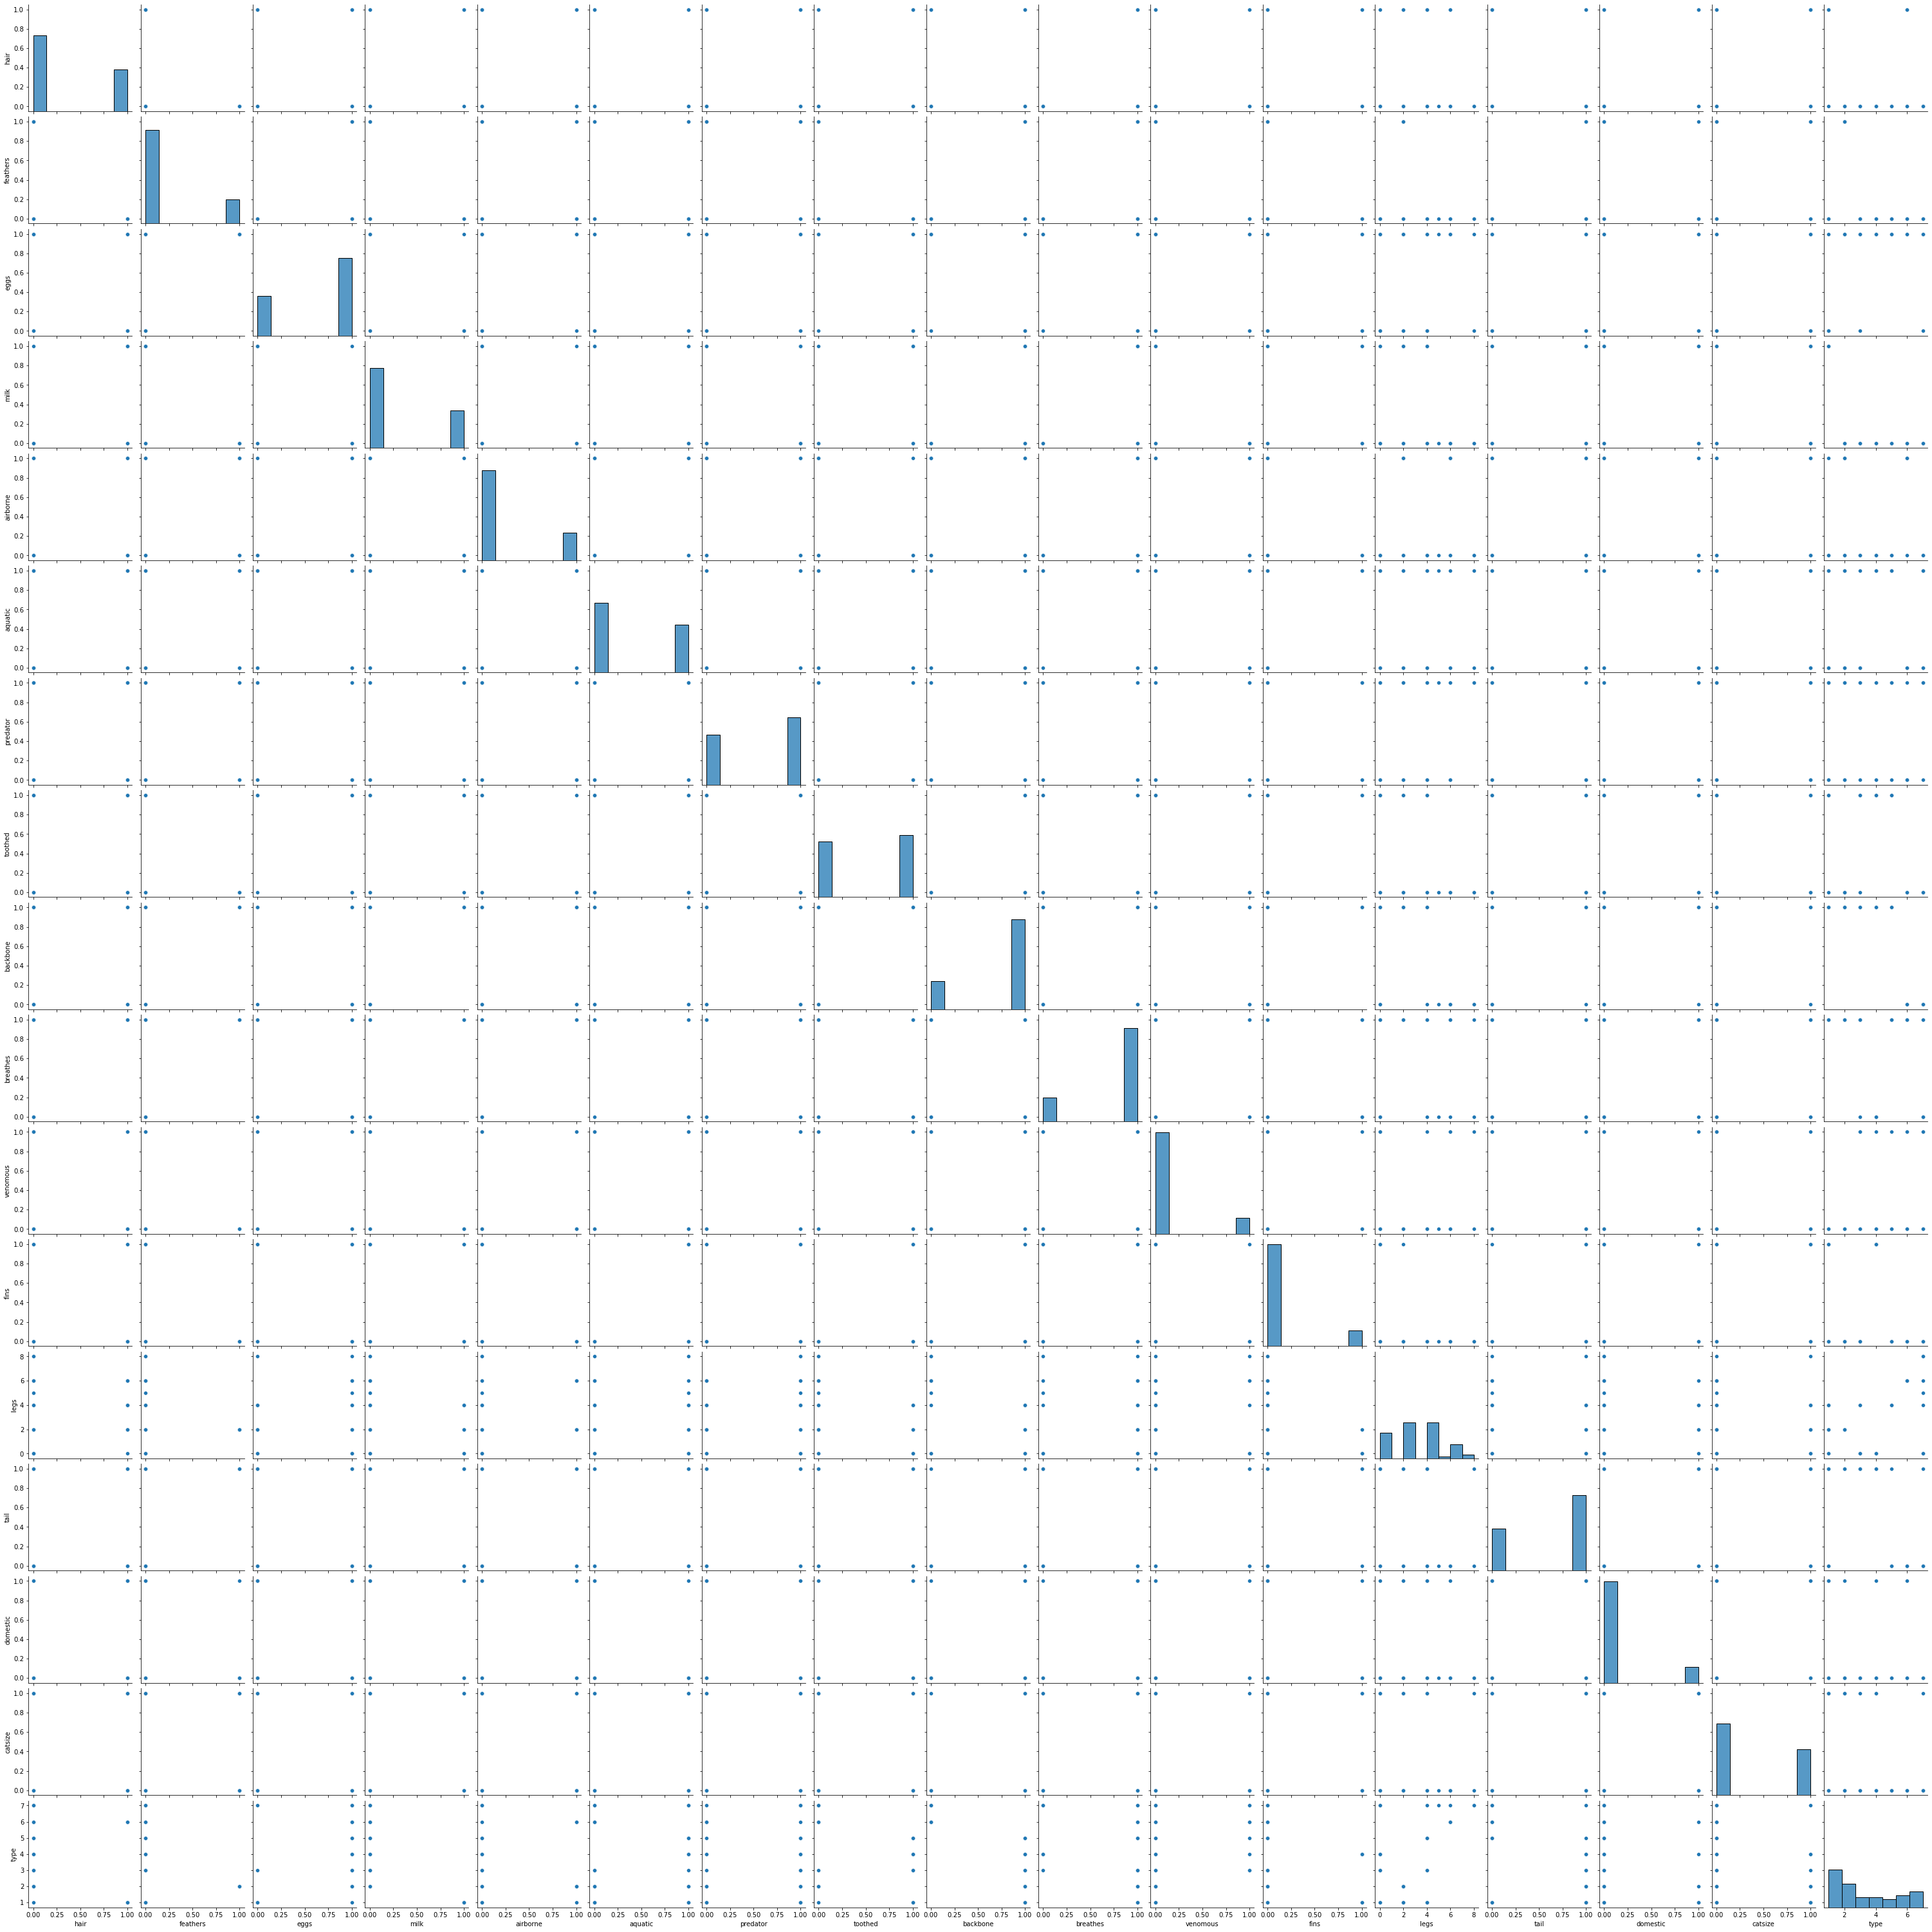

In [84]:
# A pairplot plot a pairwise relationships in a dataset
# The pairplot creates a grid of axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.
sns.pairplot(animal)

In [85]:
animal_corr = animal.corr()
animal_corr

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.375629,-0.738958,0.851344,-0.081801,-0.327336,-0.222198,0.422943,0.165011,0.375629,-0.087627,-0.087627,0.217612,-0.038847,0.325973,0.276800,-0.506624
feathers,-0.375629,1.000000,0.361847,-0.348248,0.509992,-0.075548,-0.077991,-0.531672,0.281838,0.255319,-0.200125,-0.200125,-0.212423,0.375629,-0.077132,0.114141,-0.279029
eggs,-0.738958,0.361847,1.000000,-0.885789,0.315264,0.228552,0.038072,-0.608878,-0.315264,-0.272893,0.074451,-0.030135,-0.034081,-0.158439,-0.239308,-0.308595,0.589878
milk,0.851344,-0.348248,-0.885789,1.000000,-0.299153,-0.201502,-0.069674,0.582364,0.384419,0.348248,-0.272965,0.044896,0.015825,0.133544,0.256802,0.415999,-0.692458
airborne,-0.081801,0.509992,0.315264,-0.299153,1.000000,-0.218568,-0.327968,-0.507109,-0.157143,0.281838,0.011835,-0.220911,0.138416,-0.001410,0.011835,-0.200762,0.034529
aquatic,-0.327336,-0.075548,0.228552,-0.201502,-0.218568,1.000000,0.360953,0.096032,0.056360,-0.524479,0.075159,0.478287,-0.202797,-0.032978,-0.227186,0.045565,0.214084
predator,-0.222198,-0.077991,0.038072,-0.069674,-0.327968,0.360953,1.000000,0.078002,0.005466,-0.262859,0.139243,0.139243,-0.088966,0.007285,-0.261506,0.122776,0.101018
toothed,0.422943,-0.531672,-0.608878,0.582364,-0.507109,0.096032,0.078002,1.000000,0.586894,0.025726,-0.020165,0.376407,-0.283499,0.215076,0.178121,0.133292,-0.458172
backbone,0.165011,0.281838,-0.315264,0.384419,-0.157143,0.056360,0.005466,0.586894,1.000000,0.312035,-0.244580,0.220911,-0.492674,0.667098,0.104538,0.364142,-0.845807
breathes,0.375629,0.255319,-0.272893,0.348248,0.281838,-0.524479,-0.262859,0.025726,0.312035,1.000000,-0.168856,-0.414843,0.232129,0.152040,0.077132,0.144871,-0.502188


<AxesSubplot:>

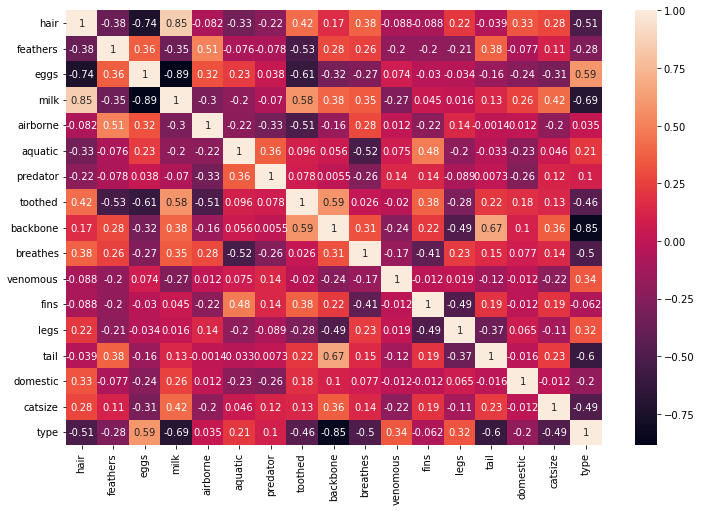

In [86]:
plt.figure(figsize=(12,8))
sns.heatmap(animal_corr, annot=True)

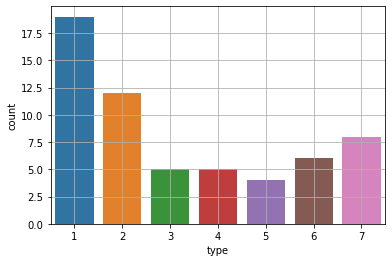

In [87]:
sns.countplot(animal['type'])
plt.grid(True)

In [89]:
X = animal.drop('type', axis=1)
y = animal[['type']]

In [90]:
#splitting train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [91]:
print('X_train_shape :',X_train.shape ,'\n y_train_shape :',y_train.shape)

X_train_shape : (47, 16) 
 y_train_shape : (47, 1)


In [92]:
print('X_test_shape :',X_test.shape ,'\n y_test_shape :',y_test.shape)

X_test_shape : (12, 16) 
 y_test_shape : (12, 1)


# Entropy Model

In [93]:
# The accuracy score of the training data will be 1 if we don't choose the max depth = 3. This parameter reduces the accuracy score of the train data.
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

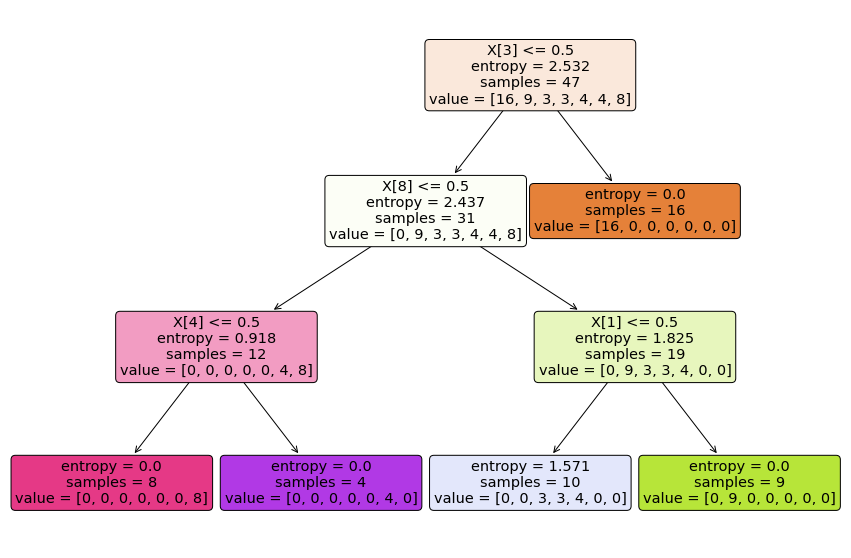

In [94]:
# Plotting Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(entropy_model, filled=True, rounded=True)
plt.show()

In [97]:
#prediction of train data
pred_train_y = entropy_model.predict(X_train)

In [98]:
#prediction of test data
pred_test_y = entropy_model.predict(X_test)

In [99]:
pred_test_y

array([2, 7, 1, 5, 2, 1, 2, 1, 5, 6, 5, 5], dtype=int64)

In [100]:
pd.Series(pred_test_y).value_counts()

5    4
2    3
1    3
7    1
6    1
dtype: int64

In [101]:
# Checking accuracy of model for test data
accuracy_score(y_test,pred_test_y)

0.5833333333333334

In [102]:
confusion_matrix(y_test,pred_test_y)

array([[3, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [103]:
# Checking accuracy of model for train data
accuracy_score(y_train,pred_train_y)

0.8723404255319149

In [104]:
confusion_matrix(y_train,pred_train_y)

array([[16,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  8]], dtype=int64)

# Gini Model

In [105]:
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3)
gini_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

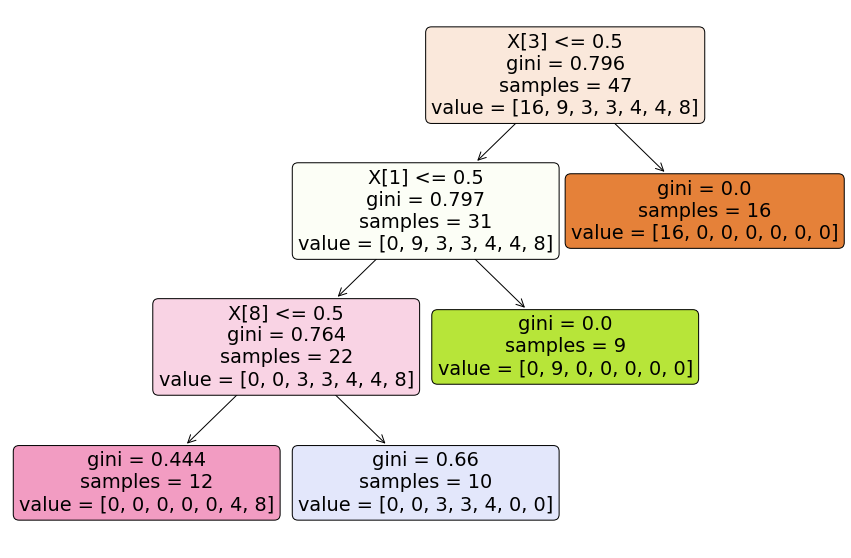

In [106]:
# Plotting Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(gini_model, filled=True, rounded=True)
plt.show()

In [108]:
#prediction train data
pred_gini_train_y = gini_model.predict(X_train)

In [109]:
# Predicting company_data by gini 
pred_gini_test_y = gini_model.predict(X_test)
pred_gini_test_y

array([2, 7, 1, 5, 2, 1, 2, 1, 5, 7, 5, 5], dtype=int64)

In [110]:
pd.Series(pred_gini_test_y).value_counts()

5    4
2    3
1    3
7    2
dtype: int64

In [111]:
# Checking accuracy of model on test data
accuracy_score(y_test,pred_gini_test_y)

0.5

In [112]:
confusion_matrix(y_test,pred_gini_test_y)

array([[3, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [113]:
# Checking accuracy of model on train data
accuracy_score(y_train, pred_gini_train_y)
# The accuracy of the model is nearly 79%

0.7872340425531915

In [114]:
confusion_matrix(y_train, pred_gini_train_y)

array([[16,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  8]], dtype=int64)

Conclusion - accuracy of KNN is better then decision tree but decision tree supports automatic feature interaction, whereas KNN cannot.